In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.shape

(15, 2)

In [6]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [7]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [8]:
df.shape

(15, 2)

In [9]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [10]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


### Here in the Chirps/Second min value 14.4 and max is 20.0 and temp has min val. of 69 and max 93

In [12]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_thershold ", lower_limit)
    print("Upper_thershold ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Chirps/Second is 1.6999999999999993
Lower_thershold  12.9
Upper_thershold  19.699999999999996
Outlier is Presented In Chirps/Second


Interquartile Range of Ground Temperature is 10.0
Lower_thershold  58.400000000000006
Upper_thershold  98.4
Outlier is Not Presented In Ground Temperature




By here there is an upper outlier presented

In [13]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Chirps/Secondis
20.0
19.8


No Outlier is Presented In Ground Temperature


## here 2 outlier presented on the data that not too far,And it may not affect our model the upper Thershold is 19.6

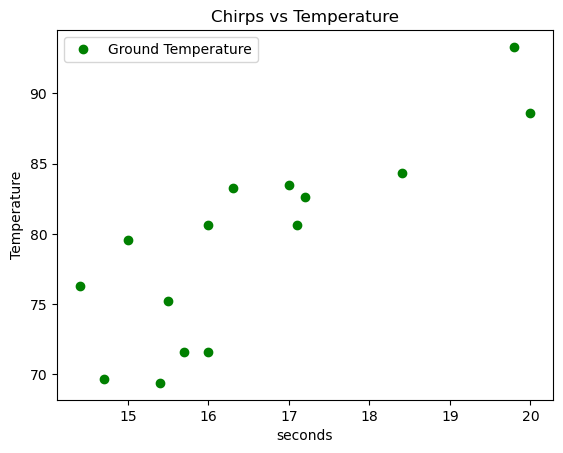

In [43]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o',c="g")
plt.title('Chirps vs Temperature')
plt.xlabel('seconds')
plt.ylabel('Temperature')
plt.show()

here there is linear relationship between feature and Target sec. incr temp. also incr. and let do the linear regression

In [17]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


# 1.find the L.R equation for this data?
###    y=m*x+c


In [16]:

X = df.loc[:, ['Chirps/Second']].values
y = df.loc[:, 'Ground Temperature'].values

from sklearn.model_selection import train_test_split                         #import the required function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
y_test

array([84.3, 71.6, 79.6, 75.2, 69.4])

In [18]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

In [38]:
from sklearn.linear_model import LinearRegression          #importing all the required functions
regressor = LinearRegression()                             # spredicted score = m * hours + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)                            #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [39]:
C = regressor.intercept_ # c
C

24.887431501361974

In [21]:
M = regressor.coef_ # slope - m
M

array([3.33071623])

In [22]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([86.17261016, 77.17967633, 74.84817497, 76.51353309, 76.18046146])

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,84.3,86.172610
1,71.6,77.179676
2,79.6,74.848175
3,75.2,76.513533
4,69.4,76.180461


## consider that x = 19 equation is y= m*x+c

In [24]:
X=19
Y = M*(X)+C
print(Y)

[88.1710399]


# 2. Chart the original data and the equation on the chart.

In [13]:
#by the queation 1 taking X and y

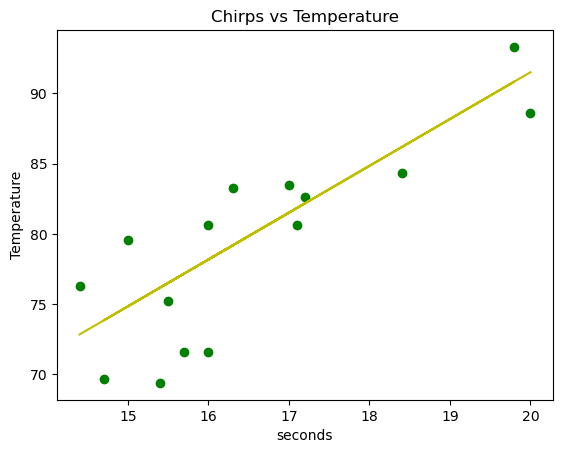

In [35]:
X = df.loc[:, ['Chirps/Second']].values
y = df.loc[:, 'Ground Temperature'].values

y_predi = regressor.predict(X)
plt.plot(X,y,"o",c="g")
plt.title('Chirps vs Temperature')
plt.xlabel('seconds')
plt.ylabel('Temperature')
plt.plot(X, y_predi,"y")

#  3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [85]:
from sklearn import metrics                              # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5744337369498733


In [86]:
regressor.score(X_test,y_test)                           # another way to get the r^2 values

0.5744337369498733

# 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [42]:
# for m regressor.coef_
# for c regressor.intercept_

ground_temp = 95
expected_Y= M*(ground_temp)+C
expected_Y

array([341.30547348])

# 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [37]:
X = df.loc[:,["Chirps/Second"]].values
y = df.loc[:,"Ground Temperature"].values

from sklearn.linear_model import LinearRegression          #importing the required functions
regressor = LinearRegression() 
regressor.fit(X,y)

y_predic=regressor.predict(X)
y_predic

array([91.0554423, 77.4141503, 90.3733777, 85.5989255, 81.1655056,
       75.7089888, 72.9807304, 76.3910534, 75.3679565, 78.4372472,
       74.0038273, 81.5065379, 77.4141503, 80.8244733, 71.9576335])

In [41]:
#chirping at a rate of 18 chirps per second
chirp = 18
gr_temp_Y = M*(chirp)+C
gr_temp_Y

array([84.84032367])